In [138]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install plotly
!pip install seaborn
!pip install scikit-learn


In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### Data Collection and Analysis

In [140]:
#Reading the file 
customer_data = pd.read_csv(r'C:\Users\Jotiba\OneDrive\Desktop\Mall_Customers.csv')

In [141]:
#Reading First five Rows of data
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [142]:
#finding number of rows and coloumns
customer_data.shape

(200, 5)

In [143]:
#getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [144]:
#checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Choosing the annual income coloumn and spending score coloumn

In [145]:
X = customer_data.iloc[:,[3,4]].values

In [146]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

#### Choosing the number of clusters

#### WCSS -> Within Clusters Sum of Squares

In [147]:
# Finding WCSS value for different numbers of clusters
wcss = []

for i in range(1, 11):  # Loop through cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_) 

# Now wcss contains the WCSS values for cluster numbers from 1 to 10


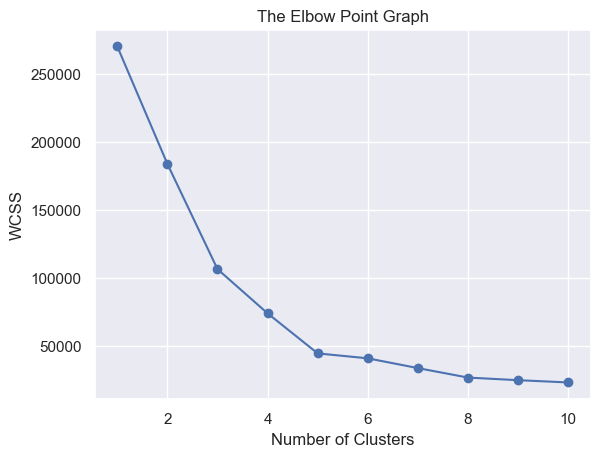

In [148]:
#plot the elbow graph
sns.set()  
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Point Graph') 
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


#### Optimum Number of Clusters = 5

#### Training the k-means Clustering Model

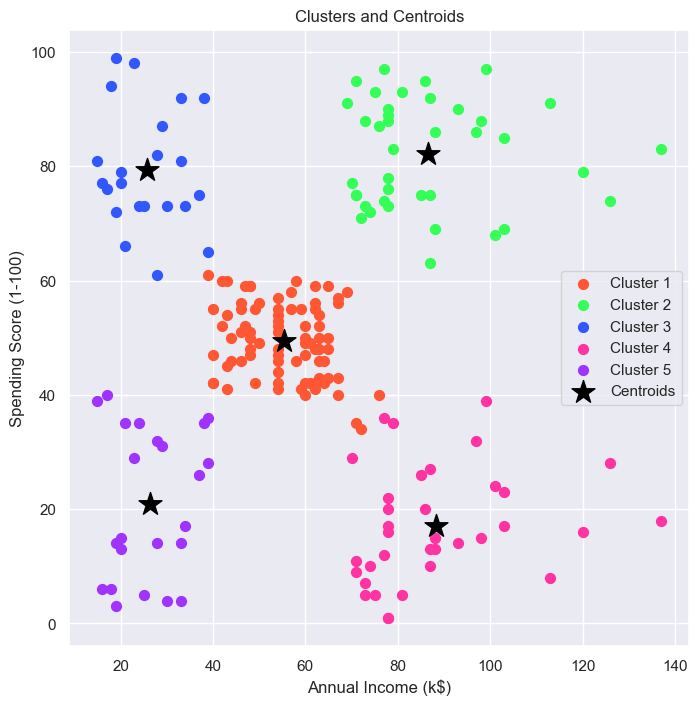

In [149]:
# Adjusting the color combinations to be more visually distinct
new_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#A133FF']  # Custom colors for each cluster

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

# Plotting all the clusters and their centroids with improved color combinations
plt.figure(figsize=(8, 8))

# Plot each cluster with distinct colors
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s=50, c=new_colors[0], label='Cluster 1')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s=50, c=new_colors[1], label='Cluster 2')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s=50, c=new_colors[2], label='Cluster 3')
plt.scatter(X[clusters == 3, 0], X[clusters == 3, 1], s=50, c=new_colors[3], label='Cluster 4')
plt.scatter(X[clusters == 4, 0], X[clusters == 4, 1], s=50, c=new_colors[4], label='Cluster 5')

# Plot the centroids with a distinct color and shape
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='black', marker='*', label='Centroids')

# Add labels and title
plt.title('Clusters and Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
